<a href="https://colab.research.google.com/github/zacichan/emap/blob/main/ECOM182%20Microeconomics%20for%20Policy/ECOM182_Topic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECOM182 - Microeconomics for Policy
## Topic 1: Utility maximisation, efficiency, equity



For this tutorial I have designed a custom function to draw an Edgeworth box using python.


The draw_Ed_Bow function is designed to create an Edgeworth Box diagram, which is a graphical representation used in economics to illustrate the concept of Pareto Efficiency and Indifference Curves in a two-person exchange economy. This function utilizes the numpy and matplotlib libraries for numerical computations and plotting.

Here's a breakdown of the key parameters and what this function does:

- **U1 and U2:** These parameters represent the utility functions of two individuals in the economy. These functions take two arguments, x and y, representing the quantities of two goods. These utility functions describe the preferences of the two individuals for different combinations of goods.

- **Xmax and Ymax:** These parameters define the maximum values for the X-axis and Y-axis of the Edgeworth Box, which represents the total quantities of the two goods available in the economy.

- **Xmin and Ymin:** These parameters define the minimum values for the X-axis and Y-axis. They have default values set to very small positive values, ensuring that the axes start from a small distance away from the origin.

- **Num_ind:** This parameter specifies the number of indifference curves to plot. Indifference curves represent combinations of goods that yield the same level of utility (indifference) to an individual. The default value is 10.

- **Xlab and Ylab:** These parameters allow you to label the X and Y axes of the Edgeworth Box. The default labels are "X" and "Y," respectively.

- **e:** The granularity of the grid for drawing the Edgeworth Box. It controls the density of grid points in the box. The default value is 200.

- **Contract_draw:** A boolean parameter that determines whether to draw the contract curve. The contract curve represents allocations that are Pareto efficient. The default is set to True.

- **AlPoint:** This parameter allows you to specify an allocation point (a tuple of X and Y values) to be marked on the Edgeworth Box. If provided, this point will be labeled as the "Allocation point."

- **colors:** A list of colors used for various elements in the plot, such as the contract curve, allocation point, and indifference curves.

- **Utility_draw:** A boolean parameter that determines whether to draw the indifference curves. The default is set to True.

The function starts by creating a grid of X and Y values within the specified ranges, which represent the possible combinations of goods in the Edgeworth Box. It then calculates the utility values for both individuals using their utility functions. The contract curve is drawn, representing Pareto-efficient allocations. If an allocation point is provided, it is marked on the plot. Finally, if desired, the indifference curves for both individuals are drawn, showing combinations of goods that yield the same level of utility.

The result is a graphical representation of the Edgeworth Box, highlighting Pareto efficiency, and the preferences of the two individuals in the exchange economy.



In [2]:
# @title Edgeworth Box Function
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the main function to draw the Edgeworth box
def draw_Ed_Bow(U1, U2, Xmax, Ymax, Xmin=10**(-6), Ymin=10**(-6),
                Num_ind=10, Xlab="X", Ylab="Y", e=200, Contract_draw=True, AlPoint=None,
                colors=["black", "Orange", "blue", "red"], Utility_draw=True):

    """
    Draw an Edgeworth Box to illustrate the concept of Pareto Efficiency and Indifference Curves.

    Parameters:
    - U1: Utility function for individual 1 (a function that takes x and y as arguments).
    - U2: Utility function for individual 2 (a function that takes x and y as arguments).
    - Xmax: Maximum value for X-axis.
    - Ymax: Maximum value for Y-axis.
    - Xmin: Minimum value for X-axis (default is a very small positive value).
    - Ymin: Minimum value for Y-axis (default is a very small positive value).
    - Num_ind: Number of indifference curves to plot (default is 10).
    - Xlab: Label for the X-axis (default is "X").
    - Ylab: Label for the Y-axis (default is "Y").
    - e: Granularity of grid for drawing the Edgeworth Box (default is 200).
    - Contract_draw: If True, draw the contract curve (default is True).
    - AlPoint: Allocation point as a tuple (X, Y) to be marked on the Edgeworth Box (default is None).
    - colors: List of colors for various elements (default is ["black", "Orange", "blue", "red"]).
    - Utility_draw: If True, draw the indifference curves (default is True).

    Returns:
    - None

    This function draws an Edgeworth Box, including the contract curve, allocation point (if provided),
    and indifference curves for two individuals with utility functions U1 and U2.
    """


    delta = min((Xmax - Xmin) / e, (Ymax - Ymin) / e)
    x = np.arange(Xmin, Xmax, delta)
    y = np.arange(Ymin, Ymax, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = lambda x, y: U1(x, y)
    Z2 = lambda x, y: U2(Xmax - x, Ymax - y)

    # Draw the contract curve
    Num_ind_1 = Num_ind
    Num_ind_2 = Num_ind

    if Contract_draw:
        Z2grad = np.gradient(Z2(X, Y))
        Z1grad = np.gradient(Z1(X, Y))
        out = (Z2grad[0] * Z1grad[1] - Z2grad[1] * Z1grad[0])
        Cont = plt.contour(X, Y, out, colors=colors[0], levels=[0])
        plt.clabel(Cont, Cont.levels, inline=True, fmt="Contract curve", fontsize=10)

        C_curv = abs(pd.DataFrame(out, index=y, columns=x))
        C_curv = C_curv.index @ (C_curv == C_curv.apply(min))
        xC_curv = np.arange(Xmin, Xmax, (Xmax - Xmin) / (Num_ind + 1))
        C_curv = np.interp(xC_curv, C_curv.index, C_curv)
        Num_ind_1 = pd.Series(Z1(xC_curv, C_curv)).sort_values(ascending=True)
        Num_ind_2 = pd.Series(Z2(xC_curv, C_curv)).sort_values(ascending=True)

    # Draw the allocation point and indifference curves
    if AlPoint is not None:
        plt.scatter(AlPoint[0], AlPoint[1], s=200, marker=".", color=colors[1], label="Allocation point")
        Num_ind_1 = [Z1(AlPoint[0], AlPoint[1])]
        Num_ind_2 = [Z2(AlPoint[0], AlPoint[1])]

    # Draw the indifference curves
    if Utility_draw:
        C1 = plt.contour(X, Y, Z1(X, Y), colors=colors[2], levels=Num_ind_1)
        C2 = plt.contour(X, Y, Z2(X, Y), colors=colors[3], levels=Num_ind_2)

    plt.title("Edgeworth box")
    plt.xlabel(Xlab)
    plt.ylabel(Ylab)


### Question 1:



---



*In a two-person, two-good pure exchange economy, Adam has an initial endowment of 15 flawless 1-carat diamonds ($D_A=15$) and 5 gallons of drinking water ($W_A=5$). Beth has no diamonds ($D_B=0$) but 20 gallons of drinking water ($W_B=20$).*



* *(a) In explaining his preferences, Adam says that he prefers $(D_A=5, W_A=10)$ to his initial endowment. He also says that he is indifferent to $(D_A=5, W_A=10)$ and $(D_A=12, W_A=5)$. Are these preferences consistent or inconsistent with the standard assumptions of the utility-maximization model?*



* *(b) What are the dimensions of the Edgeworth box that represents the possible allocations in this economy? Draw it.*




*   *(c) Show the point on the Edgeworth box that represents the initial endowments. Is it possible for these initial endowments to be an efficient allocation?*






### **Answers:**


---



#### **1.a**

Adam has identified his prefreferences for 3 bundles of goods.

$$U_1 = (15,5)$$
$$U_2 = (5,10)$$
$$U_3 = (12,5)$$

Adam strictly prefers $U_2$ to $U_1$, he is indifferent between $U_2$ and $U_3$, but this implies that he also strictly prefers $U_3$ to $U_1$.

Inspecting the bundles, we can see that the only difference between $U_1$ and $U_3$ is that $U_3$ has mppre of good $W$.

By the axiom of monotonicty, more of a good always yields higher utility.

Therefore, Adam's prefernces are inconsisten with the standard assumptions of the utility-maximation model.

#### **1.b**

The Edgeworth box represents the possible allocations in this economy. The dimensions of the Edgeworth box depend on the initial endowments of both Adam and Beth. In this case:

* Adam's initial endowment is $(D_A=15, W_A=5)$.

* Beth's initial endowment is $(D_B=0, W_B=20)$.

The dimensions of the Edgeworth box would be determined by the total quantities of each good in the economy, which are 15 diamonds and 25 gallons of water $(D_A + D_B) = 15$  and $(W_A + W_B) = 25$.

The economy is represented by the Edgeworth box below. (assumiing Cobb-Douglass utility functions)

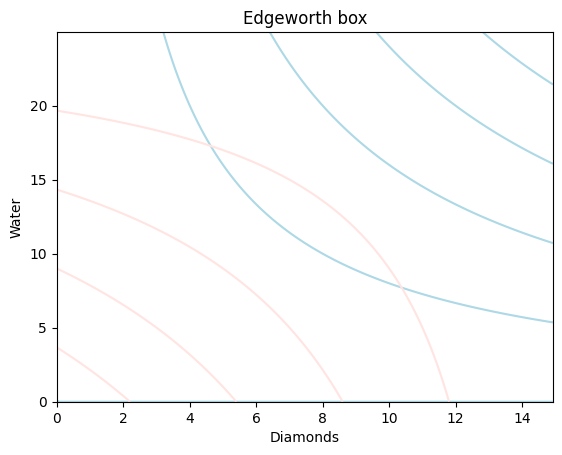

In [4]:
# @title Code
# Define the utility functions for Adam and Beth
def U1(x, y):
    return x * y

def U2(x, y):
    return x * y

# Person 1's endowment
adam_diamonds = 15
adam_water = 5

# Person 2's endowment
beth_diamonds = 0
beth_water = 20

# Call the draw_Ed_Bow function to draw the Edgeworth box
draw_Ed_Bow(
    U1=U1,
    U2=U2,
    Xmax=adam_diamonds + beth_diamonds,
    Ymax=adam_water + beth_water,
    Xmin=0,
    Ymin=0,
    Num_ind=5,
    Xlab="Diamonds",
    Ylab="Water",
    Contract_draw=False,
    AlPoint=None,
    colors=["black", "Orange", "lightblue", "mistyrose"],
    Utility_draw=True
)

# # Plot Person 1's endowment point
# plt.scatter(X1_endowment, Y1_endowment, s=100, marker="o", color="green", label="Person 1 Endowment")

# # Plot Person 2's endowment point
# plt.scatter(X2_endowment, Y2_endowment, s=100, marker="o", color="purple", label="Person 2 Endowment")

# # Add labels and legend
# plt.legend(loc="upper right")
plt.show()

#### **1.c**

The Edgeworth box including endowments can be shown by:

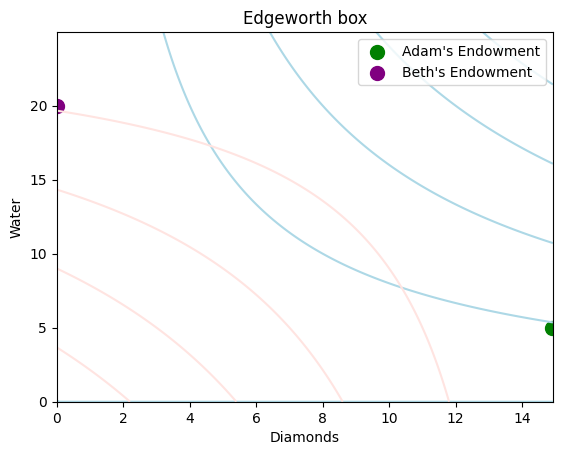

In [6]:
# @title Code
# Define the utility functions for Adam and Beth
def U1(x, y):
    return x * y

def U2(x, y):
    return x * y

# Person 1's endowment
adam_diamonds = 15
adam_water = 5

# Person 2's endowment
beth_diamonds = 0
beth_water = 20

# Call the draw_Ed_Bow function to draw the Edgeworth box
draw_Ed_Bow(
    U1=U1,
    U2=U2,
    Xmax=adam_diamonds + beth_diamonds,
    Ymax=adam_water + beth_water,
    Xmin=0,
    Ymin=0,
    Num_ind=5,
    Xlab="Diamonds",
    Ylab="Water",
    Contract_draw=False,
    AlPoint=None,
    colors=["black", "Orange", "lightblue", "mistyrose"],
    Utility_draw=True
)

# Plot Person 1's endowment point
plt.scatter((adam_diamonds-0.1), adam_water, s=100, marker="o", color="green", label="Adam's Endowment")

# Plot Person 2's endowment point
plt.scatter(beth_diamonds, beth_water, s=100, marker="o", color="purple", label="Beth's Endowment")

# Add labels and legend
plt.legend(loc="upper right")
plt.show()

Whether these initial endowments are efficient allocations depends on the concept of Pareto efficiency.

An allocation is Pareto efficient if there is no way to make one person better off without making another person worse off.

In this case, it is possible for this allocation to be a Pareto efficient allocation if Beth does not require water and she instead prefers diamonds.

If Beth does prefer diamonds to water (we have no reference to the ordinal ranking of any bundles of goods for beth), it could be the case that trading 1 unit of diamonds for 1 unit of water results in a utility loss for Beth and therefore implies that the initial endowments are efficient allocations.

### Question 2:

---

*Consider an economy of two people who consume just two goods X and Y. Person 1 has an endowment of $X_1=30$ and $Y_1=120$. Person 2 has an endowment of $X_2=180$ and $Y_2=90$. Their utility functions are, respectively, $U_1=X_1Y_1$ and $U_2=X_2Y_2$.*

* *(a) Graph the Edgeworth box corresponding to this economy.*



* *(b) What are the equations for the indifference curves of persons 1 and 2 that go through the initial endowments? Plot the curves.*



* *(c) Shade in the locus of points that are Pareto-superior to the initial endowments.*



* *(d) What is the equation of the contract curve in this economy? Graph it.*



* *(e) Identify the boundaries of points on the contract curve that are Pareto-superior to the initial endowments.*



* *(f) Suppose a secretary of the market announces that all trading must take place at $P_X=£1$ and $P_Y=£2$. Furthermore, the secretary takes away each person's initial endowment and replaces it with its cash value. The secretary instructs each person to order the quantities of X and Y that maximize utility subject to the budget constraint:*

    * *(1) What quantities will persons 1 and 2 order? Can the secretary fill these orders with the endowments collected? (Answer: No).*

    * *(2) Go through the same exercise with $P_X=£2$ and explain why the outcome is feasible and efficient.*


### **Answers:**

---

#### **2.a**

The Edgeworth box corresponding to this economy

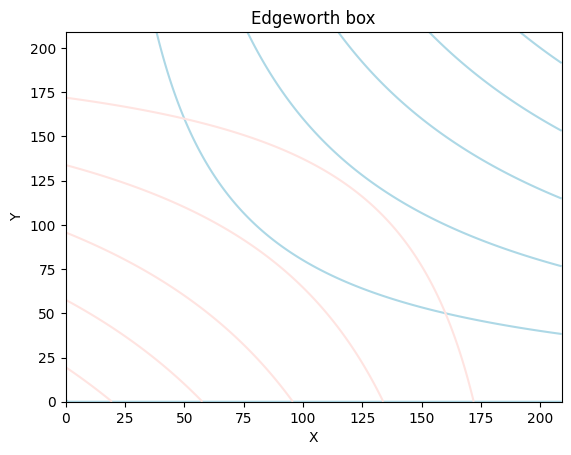

In [8]:
# @title Code
# Define the utility functions for Person 1 and Person 2
def U1(x, y):
    return x * y

def U2(x, y):
    return x * y

# Person 1's endowment
X1_endowment = 30
Y1_endowment = 120

# Person 2's endowment
X2_endowment = 180
Y2_endowment = 90

# Call the draw_Ed_Bow function to draw the Edgeworth box
draw_Ed_Bow(
    U1=U1,
    U2=U2,
    Xmax=X1_endowment + X2_endowment,
    Ymax=Y1_endowment + Y2_endowment,
    Xmin=0,
    Ymin=0,
    Num_ind=6,
    Xlab="X",
    Ylab="Y",
    Contract_draw=False,
    AlPoint=None,
    colors=["black", "Orange", "lightblue", "mistyrose"],
    Utility_draw=True
)

plt.show()

#### **2.b**



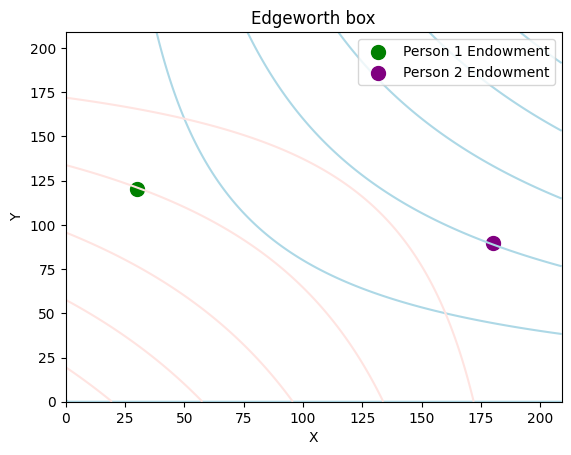

In [10]:
# @title Code
# Define the utility functions for Person 1 and Person 2
def U1(x, y):
    return x * y

def U2(x, y):
    return x * y

# Person 1's endowment
X1_endowment = 30
Y1_endowment = 120

# Person 2's endowment
X2_endowment = 180
Y2_endowment = 90

# Call the draw_Ed_Bow function to draw the Edgeworth box
draw_Ed_Bow(
    U1=U1,
    U2=U2,
    Xmax=X1_endowment + X2_endowment,
    Ymax=Y1_endowment + Y2_endowment,
    Xmin=0,
    Ymin=0,
    Num_ind=6,
    Xlab="X",
    Ylab="Y",
    Contract_draw=False,
    AlPoint=None,
    colors=["black", "Orange", "lightblue", "mistyrose"],
    Utility_draw=True
)

# Plot Person 1's endowment point
plt.scatter(X1_endowment, Y1_endowment, s=100, marker="o", color="green", label="Person 1 Endowment")

# Plot Person 2's endowment point
plt.scatter(X2_endowment, Y2_endowment, s=100, marker="o", color="purple", label="Person 2 Endowment")

# Add labels and legend
plt.legend(loc="upper right")
plt.show()